<a href="https://colab.research.google.com/github/sebas-svg/pdsei-2023-sebastian-sanchez/blob/main/Codigo_Tarea_Semana1_COLAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TAREA SEMANA 1: FILTRO MEDIA MOVIL Y GAUSSIANO**

In [ ]:
# Descargamos el audio
!wget https://github.com/sebas-svg/pdsei-2023-sebastian-sanchez/raw/main/ardillas-cantando.wav -O ardillas-cantando.wav

# Probamos el audio
from IPython.display import Audio
audio_path = "ardillas-cantando.wav"
Audio(audio_path)


--2023-09-12 00:46:16--  https://github.com/sebas-svg/pdsei-2023-sebastian-sanchez/raw/main/ardillas-cantando.wav
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sebas-svg/pdsei-2023-sebastian-sanchez/main/ardillas-cantando.wav [following]
--2023-09-12 00:46:16--  https://raw.githubusercontent.com/sebas-svg/pdsei-2023-sebastian-sanchez/main/ardillas-cantando.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1599080 (1.5M) [audio/wav]
Saving to: ‘ardillas-cantando.wav’

ardillas-cantando.w 100%[===================>]   1.52M  --.-KB/s    in 0.04s   

2023-09-12 00:46:16 (41.4 MB/s) - ‘ardill

Tasa de muestreo: 44100 muestras/segundo
Tamaño de la señal: 399744 muestras
Duración: 9.064 segundos
202000.02267573698
160000.02267573698


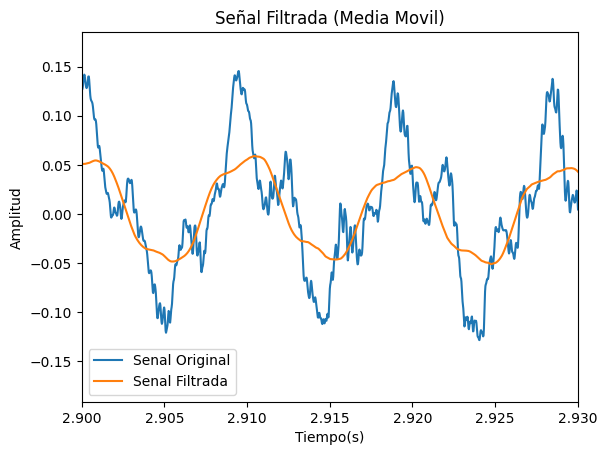

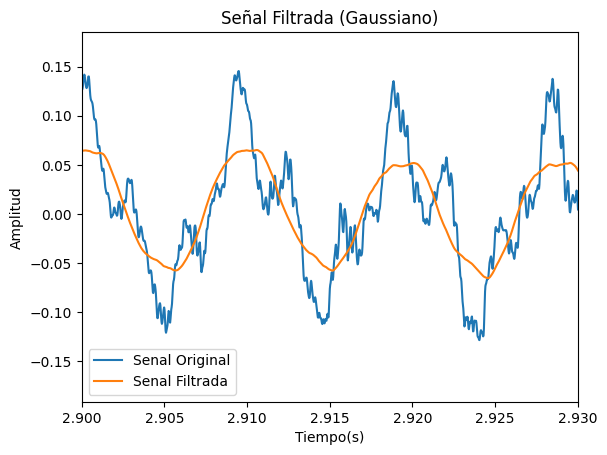

In [ ]:
import soundfile
import matplotlib.pyplot as plt
import numpy as np

audio_signal, fm = soundfile.read("ardillas-cantando.wav")

t= np.arange(0, 9.06447, 1/fm) # variable independiente discreta

dimension_t=len(t)

audio_izquierdo=audio_signal[:, 0]

type(audio_signal)

print("Tasa de muestreo: {} muestras/segundo" .format(fm))
print("Tamaño de la señal: {} muestras" .format(audio_izquierdo.shape[0]))
print("Duración: {:.3f} segundos" .format(audio_izquierdo.shape[0]/fm))
plt.plot(t,audio_izquierdo)

k=101
signal_filtrada=np.zeros_like(audio_izquierdo)

for i in range(k,dimension_t-k+1):
  signal_filtrada[i]=np.mean(audio_izquierdo[i-k:i+k])

size_ventana=1000*(2*k+1/fm)
print(size_ventana)
plt.plot(t,signal_filtrada)
plt.title("Señal Filtrada (Media Movil)")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud")
plt.legend(["Senal Original","Senal Filtrada"])
plt.xlim(2.9,2.930)

soundfile.write("filtradoMM.wav", signal_filtrada,fm)

FWHM=25
k=80

gauss_t=1000*np.arange(-k,k)/fm

filtro_gaussiano=np.exp(-4*(np.log(2)*gauss_t**2)/FWHM**2)
filtro_gaussiano_normalizado=filtro_gaussiano/np.sum(filtro_gaussiano)

signal_filtradag=np.zeros_like(audio_izquierdo)

for i in range(k,dimension_t-k+1):
  signal_filtradag[i]=np.sum(audio_izquierdo[i-k:i+k]*filtro_gaussiano_normalizado)

size_ventana=1000*(2*k+1/fm)
print(size_ventana)
plt.figure()
plt.plot(t,audio_izquierdo)
plt.plot(t,signal_filtradag)
plt.title("Señal Filtrada (Gaussiano)")
plt.xlabel("Tiempo(s)")
plt.ylabel("Amplitud")
plt.legend(["Senal Original","Senal Filtrada"])
plt.xlim(2.9,2.930)
plt.show()

soundfile.write("filtradoG.wav", signal_filtradag,fm)

In [ ]:
#Audio Filtrado Media Movil
audiofiltMM_path = "filtradoMM.wav"
Audio(audiofiltMM_path)

In [ ]:
#Audio Filtrado Gaussiano
audiofiltG_path = "filtradoG.wav"
Audio(audiofiltG_path)

**EXPLICACIÓN:**

* El filtro Media Móvil elimina los sonidos de alta frecuencia dejando solo los de baja frecuencia, en otras palabras elimina los agudos y deja los graves, en el audio que se filtro, se pudo eliminar el ruido de fondo y los sonidos chillosos, suavizando la señal de sonido y haciéndose que se escuche mejor.

* El filtro Gaussiano, de igual forma que el anterior este es un filtro de baja frecuencia, solo que un poco más suavizada.





#**TEST DE COMPROBACIÓN**

#**a. ¿Cuál es la diferencia entre una señal estocástica de una señal determinística? Explique.**

La principal diferencia entre ellas radica en la previsibilidad y regularidad de las señales:

**Una señal determinista** es aquella cuyo comportamiento se puede predecir con certeza en cualquier punto de tiempo dado. Esto quiere decir que la señal tiene patrones fijos. Además, estas pueden ser descritas mediante ecuaciones matemáticas como funciones trigonométricas y polinomios.

**Ejemplos:** Señal sinusoidal, onda cuadrada, onda triangular, etc


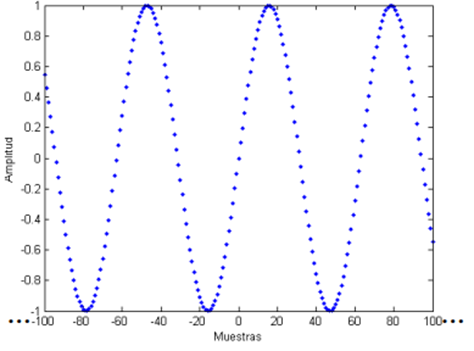

**Una señal estocástica** es aquella cuyo comportamiento no se puede predecir con certeza en cualquier punto de tiempo dado. Esto quiere decir que estas exhiben cierto grado de aleatoriedad o imprevisibilidad.
Estas se caracterizan por tener componentes aleatorios o ruido incorporado en su comportamiento. Por lo tanto, a pesar que pueda haber ciertos patrones, no se puede predecir con certeza el valor exacto de la señal en un momento futuro.

**Ejemplos:** ruido blanco, señales de audio capturadas en entornos ruidosos, fluctuaciones de precios en los mercados financieros, ondas gravitacionales, etc.


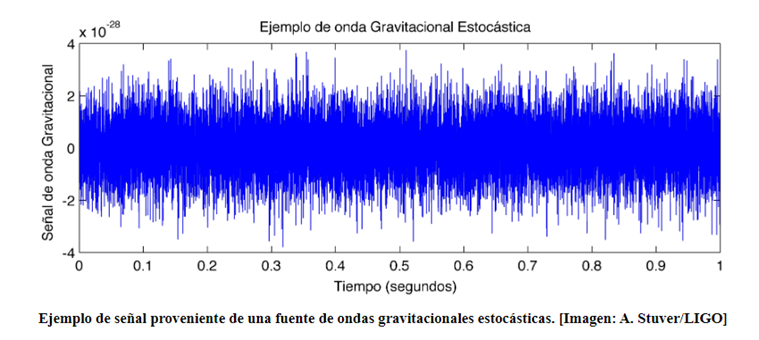 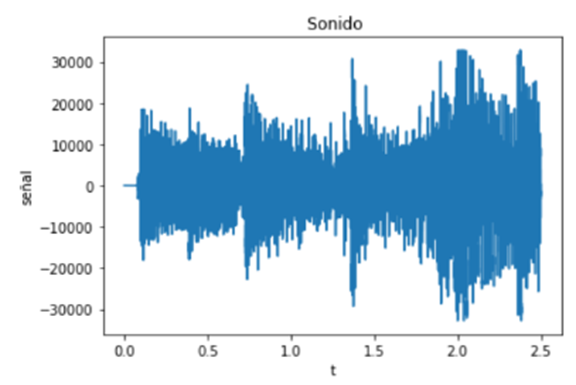

#**b.	¿Qué es la tasa de muestreo de la señal? Explique.**

La tasa de muestreo de una señal, es conocida como frecuencia de muestreo o tasa de muestreo digital, se refiere a la cantidad de muestras o mediciones discretas que se toman de una señal analógica continua en un período de tiempo específico. En otras palabras, es la velocidad a la que se capturan instantáneas de una señal analógica para convertirla en una representación digital.

#**c.	¿El filtro media móvil implementado es causal? Explique.**

El filtro de media móvil implementado ha sido no causal. Un filtro es causal cuando su salida en un momento dado depende únicamente de las entradas en el tiempo pasado y presente, sin depender de entradas futuras. En otras palabras, un filtro causal solo utiliza información de tiempo anterior o igual al tiempo presente para calcular su salida, lo cual puede ser útil para aplicaciones en tiempo real.
En nuestro caso se ha utilizado información tanto de tiempo pasado y presente como de tiempo futuro para calcular la salida en el tiempo presente. El filtro de media móvil ha calculado la media de un número específico de puntos de datos adyacentes en la señal, lo que requiere tener acceso a los puntos de datos futuros.
